<b> Import Library, find available devices </b>

In [1]:
# Initialization code for Beta Multiplier Reference Testing.
# This block identifies and initializes the connected SMUs (Source Measure Units).
# If running for the first time, ensure the SMU names are correctly referenced in the subsequent code block.

# This program (ENTER DESCRIPTION)
# This program 
# This program creates a .csv file to save the measurements.

# The setup assumes the use of three SMUs:
# - 
# - 

import pyvisa                    # Importing the pyvisa library for instrument communication
import time                      # Importing the time module to handle time-related tasks (e.g., delays)
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for plotting graphs and visualizing data
import numpy as np               # Importing numpy for numerical operations, particularly with arrays
import pandas as dp              # Importing pandas as dp for data manipulation and analysis
import os                        # Importing os to interact with the operating system, such as handling file paths
import csv                       # Importing csv to read from and write to CSV files
from datetime import date           # Importing date to read current date
rm = pyvisa.ResourceManager()    # Create a ResourceManager object, which manages communication with instruments
rm.list_resources()              # List all available resources (e.g., connected instruments) managed by pyvisa

('USB0::0x0957::0x5707::MY53802060::INSTR',
 'USB0::0x2A8D::0x0101::MY54505624::INSTR',
 'GPIB6::6::INSTR',
 'USB0::0x0957::0x0607::MY45002108::0::INSTR',
 'USB0::0x0957::0x1796::MY57231548::0::INSTR',
 'USB0::0x0957::0x1796::MY57231553::0::INSTR',
 'USB0::0x0957::0x17B6::MY56310504::0::INSTR',
 'USB0::0x0957::0x2C07::MY57890777::0::INSTR',
 'USB0::0x2A8D::0x0101::MY57508183::0::INSTR')

In [2]:
#Establishing Connection for multimeter 1
#MM1 = rm.open_resource('USB0::10893::257::MY57508183::0::INSTR')
MM1 = rm.open_resource('USB0::0x2A8D::0x0101::MY54505624::INSTR')
MM1.read_termination = '\n'             # Set the read termination character to a newline. This tells pyvisa when to consider a message as complete when reading from the instrument.
MM1.write_termination = '\n'
MM1.baud_rate = 9600
print(MM1)                             # Print the resource object (SM_VOUT) to display its properties
print(MM1.query('*IDN?'))   

#Establishing Connection for waveform generator
WG = rm.open_resource('USB0::2391::22279::MY53802060::0::INSTR')
WG.read_termination = '\n'             # Set the read termination character to a newline. This tells pyvisa when to consider a message as complete when reading from the instrument.
WG.write_termination = '\n'
WG.baud_rate = 9600
print(WG)                             # Print the resource object (SM_VOUT) to display its properties
print(WG.query('*IDN?'))


#Establishing Connection for Temperature Chamber
CHAMBER = rm.open_resource('GPIB6::6::INSTR') 
CHAMBER.read_termination = '\n'            
CHAMBER.write_termination = '\n'           
CHAMBER.baud_rate = 9600                  
print(CHAMBER)                            
print(CHAMBER.query('STATUS?'))              

VDD_MAX=1.2
currentRange = 1e-4

TEMPlist = [125, 100, 75, 50, 25, 0, -25, -50, -75, -100, -125, -150, -175]      # List of temperatures for test

USBInstrument at USB0::0x2A8D::0x0101::MY54505624::0::INSTR
Keysight Technologies,34465A,MY54505624,A.02.14-02.40-02.14-00.49-02-01
USBInstrument at USB0::2391::22279::MY53802060::0::INSTR
Agilent Technologies,33622A,MY53802060,A.01.11-2.25-03-64-02
GPIBInstrument at GPIB6::6::INSTR
NNNNNNNNNNNNNNNNNN0


<b> Enter the Device under Test <b>

In [1]:
directory_name = input("Enter the Device under Test (DUT):")  # Prompt the user to input the temperature of the experiment, which will be used as the directory name
DUT="DUT_"+str(directory_name)                                # DUT_"directory_name"
os.makedirs(DUT, exist_ok=True)                             # Create a directory with the given name. If the directory already exists, it won't raise an error due to exist_ok=True
DATE=str(DUT)+"/"+str(date.today())                         # Create another directory for test date within DUT name.  DUT_"directory_name"/yyyy-mm-dd
os.makedirs(DATE, exist_ok=True) 

NameError: name 'os' is not defined

<b> Test Sweep Definitions </b>

In [4]:
def Chamber_INIT():
    CHAMBER.write("ON")
    CHAMBER.write("RATE=20")            # Sets the speed at which the chamber will ramp to change TEMP
    CHAMBER.write("WAIT=30")            # Sets the time that the chamber will wait once the desired temperature is reached before measurements start
    CHAMBER.write("HON")                # Turns heat on
    CHAMBER.write("CON")                # Turns cool on
    time.sleep(1) 

    print(CHAMBER.query("RATE?"))
    print(CHAMBER.query("WAIT?"))
    return




#Current scaling function to determine the appropriate scaling for the y-axis of the generated plots
def IScale(Iarray):
    
    if np.max(np.abs(Iarray)) < 1e-9:
        k = 1e12
        Iunit = 'pA' # picoamps

    elif np.max(np.abs(Iarray)) < 1e-6:
        k = 1e9
        Iunit = 'nA' # nanoamps

    elif np.max(np.abs(Iarray)) <= 1e-3:
        k = 1e6
        Iunit = 'µA' # microamps

    elif np.max(np.abs(Iarray)) < 1:
        k = 1e3
        Iunit = 'mA' # milliamps

    else:
        k = 1
        Iunit = 'A' # amps

    # Scale the current values based on the determined scaling factor
    scaled_current = k*Iarray
    
    # Return the scaled current values and the corresponding unit for the y-axis
    return scaled_current, Iunit 




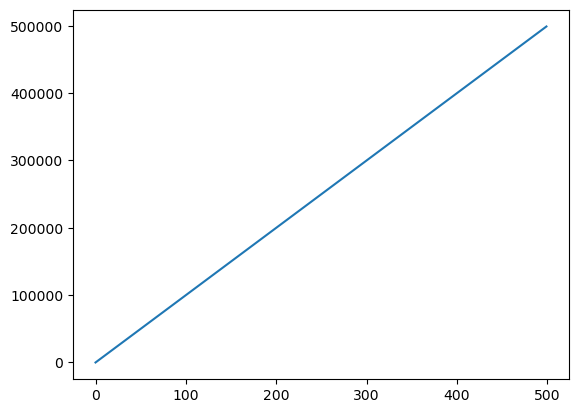

In [3]:
points=[]
points2=[]
for x in range(500):
    points.append(x)
    points2.append(x*1000)
#M2plot = plt.subplots(layout='constrained')
M2plot = plt.plot(points, points2)
#M2plot.plot(points, points2)

In [15]:
MM1.write("SAMP:COUN 500")
MM1.write("SAMP:TIM .01")

VisaIOError: VI_ERROR_SYSTEM_ERROR (-1073807360): Unknown system error (miscellaneous error).

In [21]:
MM1.write("*RST")

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

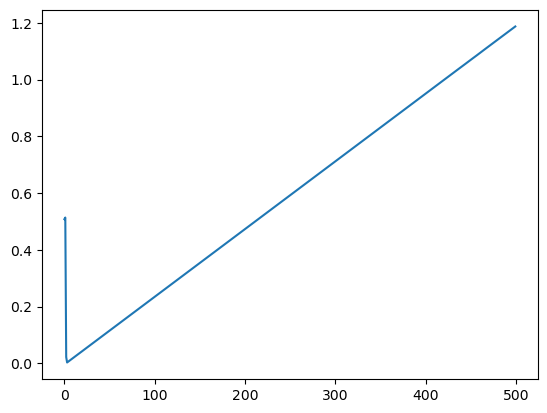

In [26]:
MM1.write("ABOR")
time.sleep(1)
WG.write("OUTP 0")
WG.write("*RST; *CLS")
MM1.write("*RST; *CLS")
time.sleep(2)
MM1.write(":CONF:VOLT:DC")
WG.write("OUTP:LOAD INF")
WG.write("TRIG1:SOUR BUS")


WG.write("FUNC RAMP")
WG.write("FUNC:RAMP:SYMM 100")
WG.write("FREQ .1")
WG.write("VOLT 1.2")
WG.write("VOLT:OFFS .6")
#WG.write("SYMM 100")

WG.write("BURS:MODE TRIG")
WG.write("BURS:STAT ON")
#WG.write("BURS:INT:NCYC 1") #error?
WG.write("BURS:PHASE -180")

WG.write("TRAC ON")
WG.write("OUTP:TRIG ON")

MM1.write("VOLT:NPLC .2")
MM1.write("TRIG:COUN 1")
MM1.write("SAMP:SOUR TIM")
MM1.write("SAMP:COUN 500")
MM1.write("SAMP:TIM .02")
MM1.write("TRIG:SOUR EXT;SLOP POS")
MM1.write("VOLT:RANG 1.2")
MM1.write("INIT")
WG.write("OUTP 1")
WG.write("TRIG")
#WG.write("OUTP:TRIG ON")

time.sleep(12)
MM1data=MM1.query("FETC?").split(',')
time.sleep(1)
#M1plot = plt.subplots(layout='constrained')
M1plot =plt.plot(points, np.asarray(MM1data, dtype='float'))

<b> Example Sweep (w/o Temp Chamber) <b>

In [ ]:
cm=plt.get_cmap('gist_rainbow')

iddfig, IDDplot = plt.subplots(layout='constrained')
IDDplot.set_title('VDD Downward Sweep ', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
IDDplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
IDDplot.set_xticks(np.arange(0, 1.3, 0.1))
IDDplot.tick_params(axis='both', which='major', labelsize=10)
IDDplot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
IDDplot.set_xlim(0, 1.2)
IDDplot.grid()

pddfig, PDDplot = plt.subplots(layout='constrained')
PDDplot.set_title('VDD Downward Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PDDplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
PDDplot.set_xticks(np.arange(0, 1.3, 0.1))
PDDplot.tick_params(axis='both', which='major', labelsize=10)
PDDplot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
PDDplot.set_xlim(0, 1.2)
PDDplot.grid()

idufig, IDUplot = plt.subplots(layout='constrained')
IDUplot.set_title('VDD Upward Sweep ', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
IDUplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
IDUplot.set_xticks(np.arange(0, 1.3, 0.1))
IDUplot.tick_params(axis='both', which='major', labelsize=10)
IDUplot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
IDUplot.set_xlim(0, 1.2)
IDUplot.grid()

pdufig, PDUplot = plt.subplots(layout='constrained')
PDUplot.set_title('VDD Upward Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PDUplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
PDUplot.set_xticks(np.arange(0, 1.3, 0.1))
PDUplot.tick_params(axis='both', which='major', labelsize=10)
PDUplot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
PDUplot.set_xlim(0, 1.2)
PDUplot.grid()

pfig, PMOS = plt.subplots(layout='constrained')
PMOS.set_title('PMOS Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PMOS.set_xlabel('PMOS Voltage (V)', fontdict={'fontsize': 12})
PMOS.set_xticks(np.arange(0, 1.3, 0.1))
PMOS.tick_params(axis='both', which='major', labelsize=10)
PMOS.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
PMOS.set_xlim(0, 1.2)
PMOS.grid()

nfig, NMOS = plt.subplots(layout='constrained')
NMOS.set_title('NMOS Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
NMOS.set_xlabel('NMOS Voltage (V)', fontdict={'fontsize': 12})
NMOS.set_xticks(np.arange(0, 1.3, 0.1))
NMOS.tick_params(axis='both', which='major', labelsize=10)
NMOS.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
NMOS.set_xlim(0, 1.2)
NMOS.grid()

for TEMP in TEMPlist:
#TEMP = 25       #Temporary temperature setting for room temperature testing
    local=str(DATE)+"/TEMP_"+str(TEMP)               # The temperature of the experiment gets set as the sub directory name. DUT_"directory_name"/yyyy-mm-dd/TEMP_"TEMP"
    os.makedirs(local, exist_ok=True)                # Create a directory with the given name. If the directory already exists, it won't raise an error due to exist_ok=True


    # Prevent annoying everyone while I'm testing (Must turn off beep after every reset in each sweep to keep it off)
    SM_NMOS.write("SYST:BEEP:STAT OFF")           # Turn off the beeper on the NMOS SMU
    SM_PMOS.write("SYST:BEEP:STAT OFF")           # Turn off the beeper on the PMOS SMU
    SM_VDD.write("SYST:BEEP:STAT OFF")            # Turn off the beeper on the VDD SMU


    VDD_INIT()
    NMOS_INIT()
    PMOS_INIT()

    NMOS_On()
    VDD_On()
    PMOS_On()

    time.sleep(2)

    #########################################################################
    ########################## VDD Downward Sweep ###########################
    #########################################################################
    VDDD, IDDD, PMOSID, = VDD_Sweep_Down(local)

    scaled_IDD, Iunit = IScale(np.asarray(IDDD, dtype='float'))
    IDDplot.plot(np.asarray(VDDD, dtype='float'), scaled_IDD, label="T=" + str(TEMP) + " °C")
    IDDplot.set_ylabel('IDD Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})

    scaled_PMOSI, Iunit = IScale(np.asarray(PMOSID, dtype='float'))
    PDDplot.plot(np.asarray(VDDD, dtype='float'), scaled_PMOSI, label="T=" + str(TEMP) + " °C")
    PDDplot.set_ylabel('PMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})
    

    time.sleep(1)
    VDD_INIT()
    PMOS_INIT()
    time.sleep(1)

    #######################################################################
    ########################## VDD Upward Sweep ###########################
    #######################################################################
    VDDU, IDDU, PMOSIU, = VDD_Sweep_Up(local)

    scaled_IDD, Iunit = IScale(np.asarray(IDDU, dtype='float'))
    IDUplot.plot(np.asarray(VDDU, dtype='float'), scaled_IDD, label="T=" + str(TEMP) + " °C")
    IDUplot.set_ylabel('IDD Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})


    scaled_PMOSI, Iunit = IScale(np.asarray(PMOSIU, dtype='float'))
    PDUplot.plot(np.asarray(VDDU, dtype='float'), scaled_PMOSI, label="T=" + str(TEMP) + " °C")
    PDUplot.set_ylabel('PMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})

    #Generate VDD IV Plot for each temperature with upward & downward sweep on the same plot
    #Generate a VDD IV plot for a given temperature
    fig, VTEMP = plt.subplots(layout='constrained')
    scaled_IDDD, Iunit = IScale(np.asarray(IDDD, dtype='float'))
    scaled_IDDU, Iunit = IScale(np.asarray(IDDU, dtype='float'))
    VTEMP.set_title('VDD Sweep at T = ' + str(TEMP) + " °C", fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
    VTEMP.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
    VTEMP.set_ylabel('IDD Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})
    VTEMP.set_xticks(np.arange(0, 1.3, 0.1))
    VTEMP.set_xlim(0, 1.2)
    VTEMP.tick_params(axis='both', which='major', labelsize=10)
    VTEMP.plot(np.asarray(VDDD, dtype='float'), scaled_IDDD, label="Downward Sweep")
    VTEMP.plot(np.asarray(VDDU, dtype='float'), scaled_IDDU, label="Upward Sweep")
    VTEMP.grid()
    VTEMP.legend()
    plt.close(fig)
    fig.savefig(os.path.join(local, "VDD_Sweep_IDD_T_" + str(TEMP) + ".png"))

    # Generate a VDD IV plot for a given temperature
    fig, PTEMP = plt.subplots(layout='constrained')
    scaled_PMOSID, Iunit = IScale(np.asarray(PMOSID, dtype='float'))
    scaled_PMOSIU, Iunit = IScale(np.asarray(PMOSIU, dtype='float'))
    PTEMP.set_title('VDD Sweep at T = ' + str(TEMP) + " °C", fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
    PTEMP.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
    PTEMP.set_ylabel('Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})
    PTEMP.set_xticks(np.arange(0, 1.3, 0.1))
    PTEMP.set_xlim(0, 1.2)
    PTEMP.tick_params(axis='both', which='major', labelsize=10)
    PTEMP.plot(np.asarray(VDDD, dtype='float'), scaled_PMOSID, label="Downward Sweep")
    PTEMP.plot(np.asarray(VDDU, dtype='float'), scaled_PMOSIU, label="Upward Sweep")
    PTEMP.grid()
    PTEMP.legend()
    plt.close(fig)
    fig.savefig(os.path.join(local, "VDD_Sweep_PMOSI_T_" + str(TEMP) + ".png"))


    time.sleep(1)
    VDD_INIT()
    VDD_On()
    PMOS_INIT()
    PMOS_On()
    time.sleep(1)

    ################################################################
    ########################## PMOS Sweep ##########################
    ################################################################
    PMOSV, PMOSI = PMOS_Sweep(TEMP, local)
    scaled_PMOSI, Iunit = IScale(np.asarray(PMOSI, dtype='float'))
    PMOS.plot(np.asarray(PMOSV, dtype='float'), scaled_PMOSI, label="T=" + str(TEMP) + " °C")
    PMOS.set_ylabel('PMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})


    time.sleep(1)
    PMOS_INIT()
    PMOS_On()
    time.sleep(1)

    ################################################################
    ########################## NMOS Sweep ##########################
    ################################################################
    NMOSV, NMOSI = NMOS_Sweep(TEMP, local)
    scaled_NMOSI, Iunit = IScale(np.asarray(NMOSI, dtype='float'))
    NMOS.plot(np.asarray(NMOSV, dtype='float'), scaled_NMOSI, label="T=" + str(TEMP) + " °C")
    NMOS.set_ylabel('NMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})



    time.sleep(1)
    NMOS_INIT()
    NMOS_On()
    time.sleep(1)

# Adjust the linewidth of the legend lines and legend location for each plot
for line in IDDplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in PDDplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in IDUplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in PDUplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in PMOS.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in NMOS.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)

# Save the generated plots to the specified directory
iddfig.savefig(os.path.join(DATE, "VDD_Sweep_Down_IDD.png"))
pddfig.savefig(os.path.join(DATE, "VDD_Sweep_Down_PMOSI.png"))
idufig.savefig(os.path.join(DATE, "VDD_Sweep_Up_IDD.png"))
pdufig.savefig(os.path.join(DATE, "VDD_Sweep_Up_PMOSI.png"))
pfig.savefig(os.path.join(DATE, "PMOS_Sweep.png"))
nfig.savefig(os.path.join(DATE, "NMOS_Sweep.png"))

# Turn off the SMUs
SM_PMOS.write("OUTP:STAT 0")
SM_NMOS.write("OUTP:STAT 0") 
SM_VDD.write("OUTP:STAT 0")


In [ ]:
VDD_INIT()
NMOS_INIT()
PMOS_INIT()

NMOS_On()
VDD_On()
PMOS_On()

###############################################################
##################### VDD Downward Sweep ######################
###############################################################
VDD_Sweep_Down()
time.sleep(1)
VDD_INIT()
PMOS_INIT()
time.sleep(1)
###############################################################
##################### VDD Upwnward Sweep ######################
###############################################################
VDD_Sweep_Up()
time.sleep(1)
VDD_INIT()
VDD_On()
PMOS_INIT()
PMOS_On()
time.sleep(1)
######################################################
##################### PMOS Sweep #####################
######################################################
PMOS_Sweep()
time.sleep(1)
PMOS_INIT()
PMOS_On()
time.sleep(1)
######################################################
##################### NMOS Sweep #####################
######################################################
NMOS_Sweep()
time.sleep(1)
NMOS_INIT()
NMOS_On()
time.sleep(1)

<b> Test Protocol </b>

In [ ]:
################## Initial creation and format of overall IV curves ##################
# Create a color map for the plots
cm=plt.get_cmap('gist_rainbow')

# Create a figure for the overall IDD plot for the VDD Downward Sweep
iddfig, IDDplot = plt.subplots(layout='constrained')
IDDplot.set_title('VDD Downward Sweep ', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
IDDplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
IDDplot.set_xticks(np.arange(0, 1.3, 0.1))
IDDplot.tick_params(axis='both', which='major', labelsize=10)
IDDplot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
IDDplot.set_xlim(0, 1.2)
IDDplot.grid()

# Create a figure for the overall PMOSI plot for the VDD Downward Sweep
pddfig, PDDplot = plt.subplots(layout='constrained')
PDDplot.set_title('VDD Downward Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PDDplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
PDDplot.set_xticks(np.arange(0, 1.3, 0.1))
PDDplot.tick_params(axis='both', which='major', labelsize=10)
PDDplot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
PDDplot.set_xlim(0, 1.2)
PDDplot.grid()

# Create a figure for the overall IDD plot for the VDD Upward Sweep
idufig, IDUplot = plt.subplots(layout='constrained')
IDUplot.set_title('VDD Upward Sweep ', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
IDUplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
IDUplot.set_xticks(np.arange(0, 1.3, 0.1))
IDUplot.tick_params(axis='both', which='major', labelsize=10)
IDUplot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
IDUplot.set_xlim(0, 1.2)
IDUplot.grid()

# Create a figure for the overall PMOSI plot for the VDD Upward Sweep
pdufig, PDUplot = plt.subplots(layout='constrained')
PDUplot.set_title('VDD Upward Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PDUplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
PDUplot.set_xticks(np.arange(0, 1.3, 0.1))
PDUplot.tick_params(axis='both', which='major', labelsize=10)
PDUplot.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
PDUplot.set_xlim(0, 1.2)
PDUplot.grid()

# Create a figure for the overall PMOSI plot for the PMOS Sweep
pfig, PMOS = plt.subplots(layout='constrained')
PMOS.set_title('PMOS Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PMOS.set_xlabel('PMOS Voltage (V)', fontdict={'fontsize': 12})
PMOS.set_xticks(np.arange(0, 1.3, 0.1))
PMOS.tick_params(axis='both', which='major', labelsize=10)
PMOS.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
PMOS.set_xlim(0, 1.2)
PMOS.grid()

# Create a figure for the overall NMOSI plot for the NMOS Sweep
nfig, NMOS = plt.subplots(layout='constrained')
NMOS.set_title('NMOS Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
NMOS.set_xlabel('NMOS Voltage (V)', fontdict={'fontsize': 12})
NMOS.set_xticks(np.arange(0, 1.3, 0.1))
NMOS.tick_params(axis='both', which='major', labelsize=10)
NMOS.set_prop_cycle ('color', [cm(1.*i/len(TEMPlist)) for i in range(len(TEMPlist))])
NMOS.set_xlim(0, 1.2)
NMOS.grid()



#TODO: add an initialization section to set ranges so that functions can be condensed
Chamber_INIT()

VDD_INIT()
NMOS_INIT()
PMOS_INIT()

NMOS_On()
VDD_On()
PMOS_On()


for TEMP in TEMPlist:
    local=str(DATE)+"/TEMP_"+str(TEMP)                          # The temperature of the experiment gets set as the sub directory name. DUT_"directory_name"/yyyy-mm-dd/TEMP_"TEMP"
    os.makedirs(local, exist_ok=True)                           # Create a directory with the given name. If the directory already exists, it won't raise an error due to exist_ok=True
    
    CHAMBER.write("WAIT=30")                                    # Resets the wait time of the temp chamber to 30 minutes so it doesn't time out mid test
    CHAMBER.write("SET=" + str(TEMP))
    # TODO: There is probably a better way to check for temperature settling and do wait time
    while (CHAMBER.query("STATUS?")[3] == 'N'):                 # Checks if the temperature chamber has arrived at TEMP yet or not
        time.sleep(15)
        print(CHAMBER.query("STATUS?"))  
    print(CHAMBER.query("STATUS?"))
    time.sleep(300)                                             # Soak time


    #########################################################################
    ########################## VDD Downward Sweep ###########################
    #########################################################################
    VDDD, IDDD, PMOSID, = VDD_Sweep_Down(local)

    # Update overall VDD Downward plot with IDD data for current temperature
    scaled_IDD, Iunit = IScale(np.asarray(IDDD, dtype='float'))
    IDDplot.plot(np.asarray(VDDD, dtype='float'), scaled_IDD, label="T=" + str(TEMP) + " °C")
    IDDplot.set_ylabel('IDD Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})

    # Update overall VDD Downward plot with PMOSI data for current temperature
    scaled_PMOSI, Iunit = IScale(np.asarray(PMOSID, dtype='float'))
    PDDplot.plot(np.asarray(VDDD, dtype='float'), scaled_PMOSI, label="T=" + str(TEMP) + " °C")
    PDDplot.set_ylabel('PMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})


    time.sleep(1)
    VDD_INIT()
    PMOS_INIT()
    time.sleep(1)

    #######################################################################
    ########################## VDD Upward Sweep ###########################
    #######################################################################
    VDDU, IDDU, PMOSIU, = VDD_Sweep_Up(local)

    # Update overall VDD Upward plot with IDD data for current temperature
    scaled_IDD, Iunit = IScale(np.asarray(IDDU, dtype='float'))
    IDUplot.plot(np.asarray(VDDU, dtype='float'), scaled_IDD, label="T=" + str(TEMP) + " °C")
    IDUplot.set_ylabel('IDD Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})

    # Update overall VDD Upward plot with PMOSI data for current temperature
    scaled_PMOSI, Iunit = IScale(np.asarray(PMOSIU, dtype='float'))
    PDUplot.plot(np.asarray(VDDU, dtype='float'), scaled_PMOSI, label="T=" + str(TEMP) + " °C")
    PDUplot.set_ylabel('PMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})

    # Generate the IDD plot for the VDD Sweep (Upward & Downward) for a given temperature
    fig, VTEMP = plt.subplots(layout='constrained')
    scaled_IDDD, Iunit = IScale(np.asarray(IDDD, dtype='float'))
    scaled_IDDU, Iunit = IScale(np.asarray(IDDU, dtype='float'))
    VTEMP.set_title('VDD Sweep at T = ' + str(TEMP) + " °C", fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
    VTEMP.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
    VTEMP.set_ylabel('IDD Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})
    VTEMP.set_xticks(np.arange(0, 1.3, 0.1))
    VTEMP.set_xlim(0, 1.2)
    VTEMP.tick_params(axis='both', which='major', labelsize=10)
    VTEMP.plot(np.asarray(VDDD, dtype='float'), scaled_IDDD, label="Downward Sweep")
    VTEMP.plot(np.asarray(VDDU, dtype='float'), scaled_IDDU, label="Upward Sweep")
    VTEMP.grid()
    VTEMP.legend()
    plt.close(fig)
    fig.savefig(os.path.join(local, "VDD_Sweep_IDD_T_" + str(TEMP) + ".png"))

    # Generate the PMOSI plot for the VDD Sweep (Upward & Downward) for a given temperature
    fig, PTEMP = plt.subplots(layout='constrained')
    scaled_PMOSID, Iunit = IScale(np.asarray(PMOSID, dtype='float'))
    scaled_PMOSIU, Iunit = IScale(np.asarray(PMOSIU, dtype='float'))
    PTEMP.set_title('VDD Sweep at T = ' + str(TEMP) + " °C", fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
    PTEMP.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
    PTEMP.set_ylabel('Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})
    PTEMP.set_xticks(np.arange(0, 1.3, 0.1))
    PTEMP.set_xlim(0, 1.2)
    PTEMP.tick_params(axis='both', which='major', labelsize=10)
    PTEMP.plot(np.asarray(VDDD, dtype='float'), scaled_PMOSID, label="Downward Sweep")
    PTEMP.plot(np.asarray(VDDU, dtype='float'), scaled_PMOSIU, label="Upward Sweep")
    PTEMP.grid()
    PTEMP.legend()
    plt.close(fig)
    fig.savefig(os.path.join(local, "VDD_Sweep_PMOSI_T_" + str(TEMP) + ".png"))


    time.sleep(1)
    VDD_INIT()
    VDD_On()
    PMOS_INIT()
    PMOS_On()
    time.sleep(1)

    ################################################################
    ########################## PMOS Sweep ##########################
    ################################################################
    PMOSV, PMOSI = PMOS_Sweep(TEMP, local)

    # Update overall PMOSI plot with data for current temperature
    scaled_PMOSI, Iunit = IScale(np.asarray(PMOSI, dtype='float'))
    PMOS.plot(np.asarray(PMOSV, dtype='float'), scaled_PMOSI, label="T=" + str(TEMP) + " °C")
    PMOS.set_ylabel('PMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})


    time.sleep(1)
    PMOS_INIT()
    PMOS_On()
    time.sleep(1)

    ################################################################
    ########################## NMOS Sweep ##########################
    ################################################################
    NMOSV, NMOSI = NMOS_Sweep(TEMP, local)

    # Update overall NMOSI plot with data for current temperature
    scaled_NMOSI, Iunit = IScale(np.asarray(NMOSI, dtype='float'))
    NMOS.plot(np.asarray(NMOSV, dtype='float'), scaled_NMOSI, label="T=" + str(TEMP) + " °C")
    NMOS.set_ylabel('NMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})


    time.sleep(1)
    NMOS_INIT()
    NMOS_On()
    time.sleep(1)

# Adjust the linewidth of the legend lines and legend location for each plot
for line in IDDplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in PDDplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in IDUplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in PDUplot.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in PMOS.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)
for line in NMOS.legend(bbox_to_anchor=(1.02, 1), loc='upper left').get_lines():
    line.set_linewidth(2.5)

# Save the generated plots to the specified directory
iddfig.savefig(os.path.join(DATE, "VDD_Sweep_Down_IDD.png"))
pddfig.savefig(os.path.join(DATE, "VDD_Sweep_Down_PMOSI.png"))
idufig.savefig(os.path.join(DATE, "VDD_Sweep_Up_IDD.png"))
pdufig.savefig(os.path.join(DATE, "VDD_Sweep_Up_PMOSI.png"))
pfig.savefig(os.path.join(DATE, "PMOS_Sweep.png"))
nfig.savefig(os.path.join(DATE, "NMOS_Sweep.png"))



#########################################################################
############################### Cold Start ##############################
#########################################################################

############# Initial creation and format of IV curves for the Cold Start #############
# Create a figure for the overall IDD plot for the VDD Downward Sweep
iddfig, IDDplot = plt.subplots(layout='constrained')
IDDplot.set_title('Cold Start VDD Downward Sweep ', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
IDDplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
IDDplot.set_xticks(np.arange(0, 1.3, 0.1))
IDDplot.tick_params(axis='both', which='major', labelsize=10)
IDDplot.set_xlim(0, 1.2)
IDDplot.grid()

# Create a figure for the overall PMOSI plot for the VDD Downward Sweep
pddfig, PDDplot = plt.subplots(layout='constrained')
PDDplot.set_title('Cold Start VDD Downward Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PDDplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
PDDplot.set_xticks(np.arange(0, 1.3, 0.1))
PDDplot.tick_params(axis='both', which='major', labelsize=10)
PDDplot.set_xlim(0, 1.2)
PDDplot.grid()

# Create a figure for the overall IDD plot for the VDD Upward Sweep
idufig, IDUplot = plt.subplots(layout='constrained')
IDUplot.set_title('Cold Start VDD Upward Sweep ', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
IDUplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
IDUplot.set_xticks(np.arange(0, 1.3, 0.1))
IDUplot.tick_params(axis='both', which='major', labelsize=10)
IDUplot.set_xlim(0, 1.2)
IDUplot.grid()

# Create a figure for the overall PMOSI plot for the VDD Upward Sweep
pdufig, PDUplot = plt.subplots(layout='constrained')
PDUplot.set_title('Cold Start VDD Upward Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PDUplot.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
PDUplot.set_xticks(np.arange(0, 1.3, 0.1))
PDUplot.tick_params(axis='both', which='major', labelsize=10)
PDUplot.set_xlim(0, 1.2)
PDUplot.grid()

# Create a figure for the overall PMOSI plot for the PMOS Sweep
pfig, PMOS = plt.subplots(layout='constrained')
PMOS.set_title('Cold Start PMOS Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PMOS.set_xlabel('PMOS Voltage (V)', fontdict={'fontsize': 12})
PMOS.set_xticks(np.arange(0, 1.3, 0.1))
PMOS.tick_params(axis='both', which='major', labelsize=10)
PMOS.set_xlim(0, 1.2)
PMOS.grid()

# Create a figure for the overall NMOSI plot for the NMOS Sweep
nfig, NMOS = plt.subplots(layout='constrained')
NMOS.set_title('Cold Start NMOS Sweep', fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
NMOS.set_xlabel('NMOS Voltage (V)', fontdict={'fontsize': 12})
NMOS.set_xticks(np.arange(0, 1.3, 0.1))
NMOS.tick_params(axis='both', which='major', labelsize=10)
NMOS.set_xlim(0, 1.2)
NMOS.grid()


# Begin Cold Start Test Procedure
SM_PMOS.write(":OUTP OFF")
SM_NMOS.write(":OUTP OFF")
SM_VDD.write(":OUTP OFF")


CHAMBER.write("WAIT=30")                                        # Reset wait time so that it doesn't time out
time.sleep(900)                                                 # Wait 15 minutes for device to cool down
CHAMBER.write("WAIT=30")                                        # Same as above (TODO: There is probably a better way to do this)
    
NMOS_On()
VDD_On()
PMOS_On()
time.sleep(300)

local=str(DATE)+"/COLD_START"                           # The temperature of the experiment gets set as the sub directory name
os.makedirs(local, exist_ok=True)

#########################################################################
########################## VDD Downward Sweep ###########################
#########################################################################
VDDD, IDDD, PMOSID, = VDD_Sweep_Down(local)

# Update overall VDD Downward plot with IDD data for current temperature
scaled_IDD, Iunit = IScale(np.asarray(IDDD, dtype='float'))
IDDplot.plot(np.asarray(VDDD, dtype='float'), scaled_IDD)
IDDplot.set_ylabel('IDD Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})

# Update overall VDD Downward plot with PMOSI data for current temperature
scaled_PMOSI, Iunit = IScale(np.asarray(PMOSID, dtype='float'))
PDDplot.plot(np.asarray(VDDD, dtype='float'), scaled_PMOSI)
PDDplot.set_ylabel('PMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})


time.sleep(1)
VDD_INIT()
PMOS_INIT()
time.sleep(1)

#######################################################################
########################## VDD Upward Sweep ###########################
#######################################################################
VDDU, IDDU, PMOSIU, = VDD_Sweep_Up(local)

# Update overall VDD Upward plot with IDD data for current temperature
scaled_IDD, Iunit = IScale(np.asarray(IDDU, dtype='float'))
IDUplot.plot(np.asarray(VDDU, dtype='float'), scaled_IDD)
IDUplot.set_ylabel('IDD Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})

# Update overall VDD Upward plot with PMOSI data for current temperature
scaled_PMOSI, Iunit = IScale(np.asarray(PMOSIU, dtype='float'))
PDUplot.plot(np.asarray(VDDU, dtype='float'), scaled_PMOSI)
PDUplot.set_ylabel('PMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})

# Generate the IDD plot for the VDD Sweep (Upward & Downward) for a given temperature
fig, VTEMP = plt.subplots(layout='constrained')
scaled_IDDD, Iunit = IScale(np.asarray(IDDD, dtype='float'))
scaled_IDDU, Iunit = IScale(np.asarray(IDDU, dtype='float'))
VTEMP.set_title('Cold Start VDD Sweep' , fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
VTEMP.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
VTEMP.set_ylabel('IDD Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})
VTEMP.set_xticks(np.arange(0, 1.3, 0.1))
VTEMP.set_xlim(0, 1.2)
VTEMP.tick_params(axis='both', which='major', labelsize=10)
VTEMP.plot(np.asarray(VDDD, dtype='float'), scaled_IDDD, label="Downward Sweep")
VTEMP.plot(np.asarray(VDDU, dtype='float'), scaled_IDDU, label="Upward Sweep")
VTEMP.grid()
VTEMP.legend()
plt.close(fig)
fig.savefig(os.path.join(local, "CS_VDD_Sweep_IDD.png"))

# Generate the PMOSI plot for the VDD Sweep (Upward & Downward) for a given temperature
fig, PTEMP = plt.subplots(layout='constrained')
scaled_PMOSID, Iunit = IScale(np.asarray(PMOSID, dtype='float'))
scaled_PMOSIU, Iunit = IScale(np.asarray(PMOSIU, dtype='float'))
PTEMP.set_title('Cold Start VDD Sweep' , fontdict={'fontsize': 16, 'fontweight': 'bold'}, y = 1.03)
PTEMP.set_xlabel('VDD Voltage (V)', fontdict={'fontsize': 12})
PTEMP.set_ylabel('Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})
PTEMP.set_xticks(np.arange(0, 1.3, 0.1))
PTEMP.set_xlim(0, 1.2)
PTEMP.tick_params(axis='both', which='major', labelsize=10)
PTEMP.plot(np.asarray(VDDD, dtype='float'), scaled_PMOSID, label="Downward Sweep")
PTEMP.plot(np.asarray(VDDU, dtype='float'), scaled_PMOSIU, label="Upward Sweep")
PTEMP.grid()
PTEMP.legend()
plt.close(fig)
fig.savefig(os.path.join(local, "CS_VDD_Sweep_PMOSI.png"))


time.sleep(1)
VDD_INIT()
VDD_On()
PMOS_INIT()
PMOS_On()
time.sleep(1)

################################################################
########################## PMOS Sweep ##########################
################################################################
PMOSV, PMOSI = PMOS_Sweep(TEMP, local)

# Update overall PMOSI plot with data for current temperature
scaled_PMOSI, Iunit = IScale(np.asarray(PMOSI, dtype='float'))
PMOS.plot(np.asarray(PMOSV, dtype='float'), scaled_PMOSI)
PMOS.set_ylabel('PMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})


time.sleep(1)
PMOS_INIT()
PMOS_On()
time.sleep(1)

################################################################
########################## NMOS Sweep ##########################
################################################################
NMOSV, NMOSI = NMOS_Sweep(TEMP, local)

# Update overall NMOSI plot with data for current temperature
scaled_NMOSI, Iunit = IScale(np.asarray(NMOSI, dtype='float'))
NMOS.plot(np.asarray(NMOSV, dtype='float'), scaled_NMOSI)
NMOS.set_ylabel('NMOS Current (' + str(Iunit) + ')', fontdict={'fontsize': 12})


time.sleep(1)
NMOS_INIT()
NMOS_On()
time.sleep(1)

# Save the generated plots to the specified directory
iddfig.savefig(os.path.join(local, "CS_VDD_Sweep_Down_IDD.png"))
pddfig.savefig(os.path.join(local, "CS_VDD_Sweep_Down_PMOSI.png"))
idufig.savefig(os.path.join(local, "CS_VDD_Sweep_Up_IDD.png"))
pdufig.savefig(os.path.join(local, "CS_VDD_Sweep_Up_PMOSI.png"))
pfig.savefig(os.path.join(local, "CS_PMOS_Sweep.png"))
nfig.savefig(os.path.join(local, "CS_NMOS_Sweep.png"))

###############################################################
##################### Shut Down Procedure #####################
###############################################################
SM_PMOS.write(":OUTP OFF")
SM_NMOS.write(":OUTP OFF")
SM_VDD.write(":OUTP OFF")
                               
CHAMBER.write("SET=30")                             # Sets the temperature back to room temp once test is complete                      
while (CHAMBER.query("STATUS?")[3] == 'N'):         # Checks if chamber has arrived at room temp
    time.sleep(15)
CHAMBER.write("STOP")                               # Once chamber is at room temp, chamber stops operation

In [ ]:
SM_PMOS.write("OUTP:STAT 0")                                 # Turn off the VOUT source meter
SM_NMOS.write("OUTP:STAT 0") 
SM_VDD.write("OUTP:STAT 0")

In [ ]:
#CHAMBER.write("SET=25")
CHAMBER.write("STOP")